In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv("/home/jcropano/Organizacion-de-Datos/datos/train_labels.csv")
train_labels.head(10)

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
5,333020,2
6,728451,3
7,475515,1
8,441126,2
9,989500,1


In [3]:
train_values = pd.read_csv("/home/jcropano/Organizacion-de-Datos/datos/train_values.csv")
train_values.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Para el primer análisis, queremos ver el daño de las casas según su antiguedad.
#Filtramos las columnas importantes.
building_age = train_values.loc[:,['building_id' , 'age']]
building_age.head(10)

,building_id,age
0,802906,30
1,28830,10
2,94947,10
3,590882,10
4,201944,30
5,333020,10
6,728451,25
7,475515,0
8,441126,15
9,989500,0


In [5]:
#Hacemos el merge según building_id
damage_age = building_age.merge(train_labels)
damage_age.head(10)

,building_id,age,damage_grade
0,802906,30,3
1,28830,10,2
2,94947,10,3
3,590882,10,2
4,201944,30,3
5,333020,10,2
6,728451,25,3
7,475515,0,1
8,441126,15,2
9,989500,0,1


In [6]:
#Verificamos si hay NANs, pero no tiene.
damage_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   age           260601 non-null  int64
 2   damage_grade  260601 non-null  int64
dtypes: int64(3)
memory usage: 8.0 MB


In [7]:
damage_age_filtered = damage_age.loc[:,['age', 'damage_grade']]

In [8]:
damage_age_filtered.value_counts()

age  damage_grade
10   2               22370
15   2               20767
5    2               19030
20   2               18603
25   2               14073
                     ...  
150  1                   1
135  1                   1
115  1                   1
140  3                   1
110  1                   1
Length: 107, dtype: int64

In [9]:
#Experimentando...
grouped_by_damage = damage_age_filtered.groupby(['damage_grade']).mean()
grouped_by_damage = grouped_by_damage.reset_index()
col_rename = {'age':'age_mean'}
grouped_by_damage = grouped_by_damage.rename(columns = col_rename)
grouped_by_damage.head(10)

,damage_grade,age_mean
0,1,17.320490
1,2,27.342118
2,3,27.817423


Text(0, 0.5, 'Edad Promedio')

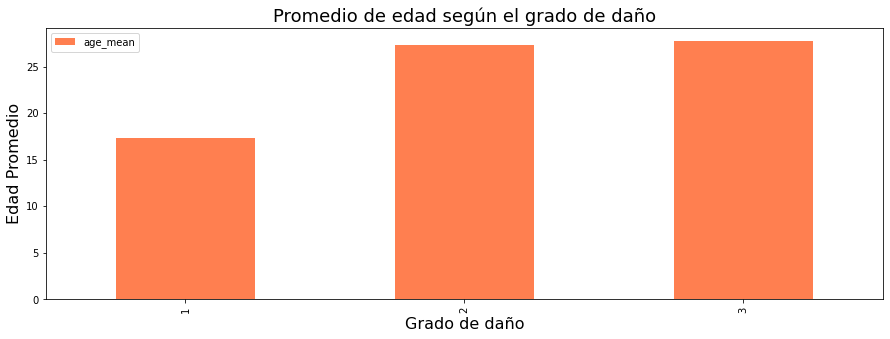

In [10]:
g = grouped_by_damage.set_index('damage_grade').plot(kind = 'bar', figsize = (15, 5), color = 'coral')
g.set_title('Promedio de edad según el grado de daño', fontsize = 18)
g.set_xlabel('Grado de daño', fontsize = 16)
g.set_ylabel('Edad Promedio', fontsize = 16)

In [11]:
grouped_by_age = damage_age_filtered.groupby(['age']).agg({'damage_grade':['mean','count']})
level_0 = grouped_by_age.columns.get_level_values(0)
level_1 = grouped_by_age.columns.get_level_values(1)
grouped_by_age.columns = level_0 + '_' + level_1
grouped_by_age.reset_index(inplace = True)
grouped_by_age.nlargest(10, 'damage_grade_count')

,age,damage_grade_mean,damage_grade_count
2,10,2.200689,38896
3,15,2.263455,36010
1,5,2.103481,33697
4,20,2.300510,32182
0,0,1.957529,26041
5,25,2.329599,24366
6,30,2.349678,18028
7,35,2.351074,10710
8,40,2.369827,10559
10,50,2.380460,7257


Text(0, 0.5, 'Grado de daño promedio')

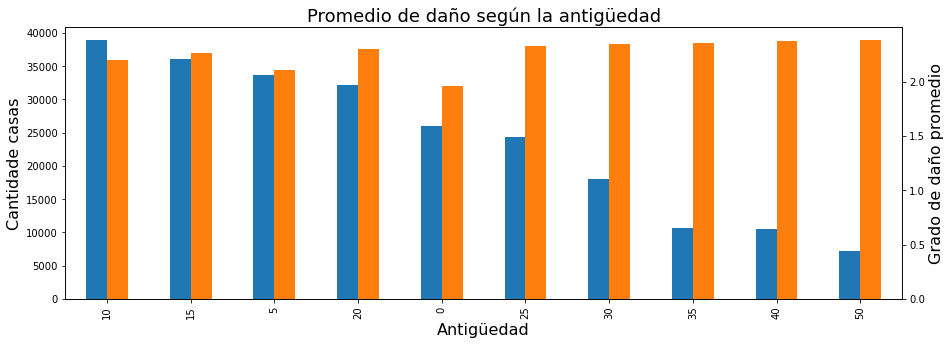

In [19]:
frequent_ages = grouped_by_age.set_index('age').nlargest(10, 'damage_grade_count')
new_col_order = ['damage_grade_count', 'damage_grade_mean']
frequent_ages = frequent_ages[new_col_order]
g = frequent_ages.plot(kind = 'bar', figsize = (15, 5), secondary_y = 'damage_grade_mean', legend = False)
g.set_title('Promedio de daño según la antigüedad', fontsize = 18)
g.set_xlabel('Antigüedad', fontsize = 16)
g.set_ylabel('Cantidade casas', fontsize = 16)
g.right_ax.set_ylabel('Grado de daño promedio', fontsize = 16)